# Градиентный бустинг своими руками



In [26]:
from sklearn.datasets import load_boston
boston = load_boston()


y = boston.target
X = boston.data
c = round(0.75*len(y))
y_train = y[:c]
x_train = X[:c]

y_test = y[c:]
x_test = X[c:]



In [27]:
# Производная квадрата разности
def pred(a, y):
    sl = -2*(a-y)
    return sl

In [48]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error

# Прогноз по композиции алгоритмов
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

a = [0]
number_reg = 50 # число деревьев для обучения
base_algorithms_list = [] # список с базовыми алгоритмами
coefficients_list = [0.9] * number_reg # коэффициенты перед алгоритмами (learning rate)

for i in range(10):
    sl = pred(gbm_predict(x_train), y_train)
    reg = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    bn = reg.fit(x_train, sl)
    a += reg.predict(x_train)
    base_algorithms_list.append(bn)
   
error = mean_squared_error(y_test, gbm_predict(x_test))
print (error**0.5)


8.634888567211597


In [49]:
coefficients_list = [0.9] 
for i in range(3):
    sl = -(gbm_predict(x_train) - y_train)
    reg = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    bn = reg.fit(x_train, sl)
    a += reg.predict(x_train)
    base_algorithms_list.append(bn)
    coefficients_list.append(0.9/(1+i))
   
    
error = mean_squared_error(y_test, gbm_predict(x_test))
print (error**0.5)

ans = error**0.5



5.3341767117093


In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

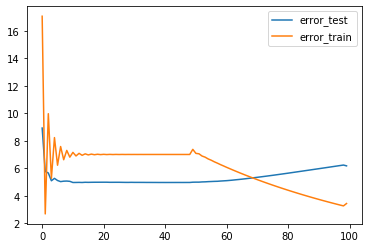

In [5]:

error_test = []
error_train = []
coefficients_list = [0.9] 
for i in range(100):
    sl = -(gbm_predict(x_train) - y_train)
    reg = DecisionTreeRegressor(max_depth = 5, random_state = 42)
    bn = reg.fit(x_train, sl)
    a += reg.predict(x_train)
    base_algorithms_list.append(bn)
    coefficients_list.append(0.9/(1+i))
    error_test.append(mean_squared_error(y_test, gbm_predict(x_test))**0.5)
    error_train.append(mean_squared_error(y_train, gbm_predict(x_train))**0.5)
ax = np.arange(100)    
plt.plot(ax, error_test, label = 'error_test')
plt.plot(ax, error_train, label = 'error_train')
plt.legend()
plt.show()

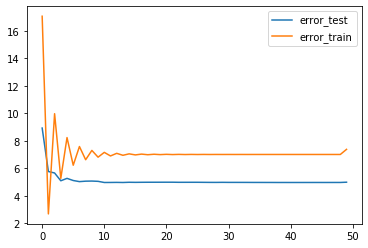

In [6]:
error_test = []
error_train = []
coefficients_list = [0.9] 
for i in range(50):
    sl = -(gbm_predict(x_train) - y_train)
    reg = DecisionTreeRegressor(max_depth = i+1, random_state = 42)
    bn = reg.fit(x_train, sl)
    a += reg.predict(x_train)
    base_algorithms_list.append(bn)
    coefficients_list.append(0.9/(1+i))
    error_test.append(mean_squared_error(y_test, gbm_predict(x_test))**0.5)
    error_train.append(mean_squared_error(y_train, gbm_predict(x_train))**0.5)
ax = np.arange(50)    
plt.plot(ax, error_test, label = 'error_test')
plt.plot(ax, error_train, label = 'error_train')
plt.legend()
plt.show()

# Лабораторная работа 2

## Бустинг своими руками для задачи классификации грибов

### Задание 1 Бустинг с постоянным шагом 0,9

Заведите массив для объектов DecisionTreeRegressor (будем их использовать в качестве базовых алгоритмов) и для вещественных чисел (это будут коэффициенты перед базовыми алгоритмами).

В цикле от обучите последовательно 100 решающих деревьев с параметрами max_depth=4 и random_state=1 (остальные параметры - по умолчанию). Сейчас все коэффициенты равны 0,9.
Рассчитайте ошибку (acuracy) модели



In [1]:
from sklearn import datasets, linear_model, metrics
import numpy as np
import pandas as pd
%pylab inline
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
df = pd.read_csv("mushrooms.csv")
df["class"].replace(["e", "p"], [1, 0], inplace= True)
df.head(10) 

Populating the interactive namespace from numpy and matplotlib


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,1,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,1,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,1,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,0,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,1,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [2]:
enc_df = pd.get_dummies(df)
enc_df

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
# Ваш код здесь
X = enc_df.drop(["class"], axis= 1)
y = df["class"]
c = round(0.75*len(y))

X_train = np.array(X[:c]).astype(np.int32)
X_test = np.array(X[c:]).astype(np.int32)

y_train = np.array(y[:c]).astype(np.int32)
y_test = np.array(y[c:]).astype(np.int32)

0.1371888371629133 0
0.12503121314827825 1
0.1315210035464807 2
0.1340315969446322 3
0.13082986687144812 4
0.13097498571413074 5
0.1314137040608313 6
0.13120816980849404 7
0.13006258507372354 8
0.1300371517476512 9
0.13001775924937328 10
0.12996899219758756 11
0.1299347139650853 12
0.12842258799352788 13
0.12842258799352832 14
0.12842258799352838 15
0.12842258799352838 16
0.12842258799352838 17
0.12842258799352838 18
0.12842258799352838 19
0.12842258799352838 20
0.12842258799352838 21
0.12842258799352838 22
0.12842258799352838 23
0.12842258799352838 24
0.12842258799352838 25
0.12842258799352838 26
0.12842258799352838 27
0.12842258799352838 28
0.12842258799352838 29
0.12842258799352838


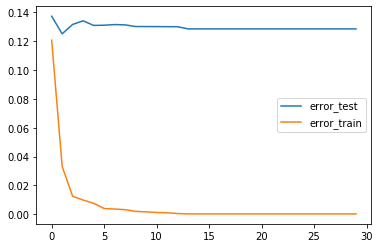

In [24]:
error_test = []
error_train = []
base_algorithms_list = [] # список с базовыми алгоритмами
coefficients_list = [0.9]  # коэффициенты перед алгоритмами (learning rate)

def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

for i in range(30):
    sl = -(gbm_predict(X_train) - y_train)
    reg = DecisionTreeRegressor(max_depth = 4, random_state = 1)
    bn = reg.fit(X_train, sl)
    base_algorithms_list.append(bn)
    coefficients_list.append(0.9)
    print(mean_squared_error(y_test, gbm_predict(X_test))**0.5, i)
    error_test.append(mean_squared_error(y_test, gbm_predict(X_test))**0.5)
    error_train.append(mean_squared_error(y_train, gbm_predict(X_train))**0.5)
   

error = mean_squared_error(y_test, gbm_predict(X_test))
print (error**0.5) 
ax = np.arange(30)    
plt.plot(ax, error_test, label = 'error_test')
plt.plot(ax, error_train, label = 'error_train')
plt.legend()
plt.show()

0.982274741506647


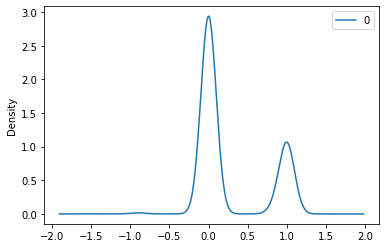

In [25]:
from statistics import mean
df2 = pd.DataFrame(gbm_predict(X_test))
df2.plot.kde()
cnt = mean(gbm_predict(X_test))
predict = [0 if x < cnt else 1 for x in gbm_predict(X_test)]
print(accuracy_score(y_test, predict))

## Задание 2 Бустниг с уменьшением шага

А теперь уменьшайте шаг вполовину на каждой итерации.
Получите ошибку модели



0.1371888371629133 0 0.45
0.12855037545226716 1 0.225
0.126083412701584 2 0.1125
0.12564369471342854 3 0.05625
0.12534180054500202 4 0.028125
0.12520302882665005 5 0.0140625
0.12516770844955435 6 0.00703125
0.12515055430361433 7 0.003515625
0.12514210078884927 8 0.0017578125
0.12513399899117464 9 0.00087890625
0.1251299583377885 10 0.000439453125
0.1251289132853608 11 0.0002197265625
0.12512790488073072 12 0.00010986328125
0.12512764393717196 13 5.4931640625e-05
0.1251275134949149 14 2.74658203125e-05
0.1251273875067267 15 1.373291015625e-05
0.1251273549011504 16 6.866455078125e-06
0.12512733859882336 17 3.4332275390625e-06
0.12512733044777513 18 1.71661376953125e-06
0.12512732637227986 19 8.58306884765625e-07
0.1251273224354146 20 4.291534423828125e-07
0.12512732046698438 21 2.1457672119140626e-07
0.12512731995755022 22 1.0728836059570313e-07
0.12512731970283325 23 5.3644180297851564e-08
0.1251273194567797 24 2.6822090148925782e-08
0.12512731939310048 25 1.3411045074462891e-08
0.12512

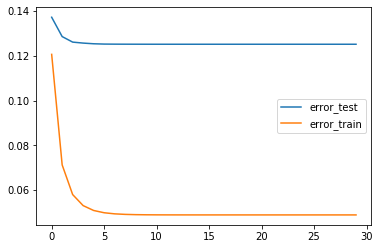

In [26]:
# Ваш код здесь
error_test = []
error_train = []
base_algorithms_list = [] # список с базовыми алгоритмами
coefficients_list = [0.9]    # коэффициенты перед алгоритмами (learning rate)

for i in range(30):
    sl = -(gbm_predict(X_train) - y_train)
    reg = DecisionTreeRegressor(max_depth = 4, random_state = 1)
    bn = reg.fit(X_train, sl)
    a += reg.predict(X_train)
    base_algorithms_list.append(bn)
    coefficients_list.append(coefficients_list[-1]/2)
    print(mean_squared_error(y_test, gbm_predict(X_test))**0.5, i, coefficients_list[-1])
    error_test.append(mean_squared_error(y_test, gbm_predict(X_test))**0.5)
    error_train.append(mean_squared_error(y_train, gbm_predict(X_train))**0.5)
   
    
error = mean_squared_error(y_test, gbm_predict(X_test))
print (error**0.5) 
ax = np.arange(30)    
plt.plot(ax, error_test, label = 'error_test')
plt.plot(ax, error_train, label = 'error_train')
plt.legend()
plt.show() 

In [1]:
from statistics import mean
df3 = pd.DataFrame(gbm_predict(X_test))
df3.plot.kde()
cnt = mean(gbm_predict(X_test))
predict = [0 if x < cnt else 1 for x in gbm_predict(X_test)]
print(accuracy_score(y_test, predict))

NameError: name 'pd' is not defined

## Задание 3 XGBoosting
Реализованный вами метод - градиентный бустинг над деревьями - очень популярен в машинном обучении. Он представлен как в самой библиотеке sklearn, так и в сторонней библиотеке XGBoost, которая имеет свой питоновский интерфейс. На практике XGBoost работает заметно лучше GradientBoostingRegressor из sklearn.

Установите библиотеку XGBoost

In [28]:
!pip install xgboost

Импортируйте установленную библиотеку

In [5]:
import xgboost as xgb
import multiprocessing
multiprocessing.set_start_method('forkserver')

ValueError: cannot find context for 'forkserver'

Создайте классификатор с помощью метода XGBClassifier() и обучите его.
Оцените полученную модель


In [ ]:
# Ваш код здесь
'''
XGB = xgb.XGBClassifier(max_depth = 5, n_estimators = 100, random_state = 1)
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)
print(mean_squared_error(y_test, pred)**0.5)
print(metrics.accuracy_score(y_test, pred))'''
obj = xgb.XGBClassifier().fit(X_train, y_train)
pred = obj.predict(X_test)
print(mean_squared_error(y_test, pred)**0.5)
print(metrics.accuracy_score(y_test, pred))

## Задание 4 Выводы

Сравните полученные модели и сделайте выводы
